In [ ]:
library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Datos

In [ ]:
dat <- read.csv("predictores_train_VIF.csv")

In [ ]:
#Como se va a modificar dat para la normalización entonces voy a crear una copia
#para luego usarla en estandatrización

copia_dat <- dat

In [ ]:
colnames(dat)
head(dat)

[1] "recursada"           "tasa_rep_carga"      "quintil_asig"       
 [4] "ceneval_analitico"   "ceneval_matematico"  "ceneval_lengua"     
 [7] "ceneval_esp"         "prom_per_prev"       "tasa_rep_doc"       
[10] "tasa_aprob_per_prev" "asigMuchas"          "año_encurso"        
[13] "complejidad_carga5"  "semestre_Otoño"      "carga_aprobada"     
[16] "total_recursando"    "situacion_Irregular"

,recursada,tasa_rep_carga,quintil_asig,ceneval_analitico,ceneval_matematico,ceneval_lengua,ceneval_esp,prom_per_prev,tasa_rep_doc,tasa_aprob_per_prev,asigMuchas,año_encurso,complejidad_carga5,semestre_Otoño,carga_aprobada,total_recursando,situacion_Irregular
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,7.242063,4.0,1012,1036,1060,1012,8.400000,64.516129,0,0,3,1,0,1,0,0
2,0,11.491945,4.0,1012,1036,1060,1012,8.500000,36.974790,1,0,3,1,1,1,0,0
3,0,11.772288,5.1,1012,1036,1060,1012,7.333333,33.029197,1,0,4,1,0,1,0,0
4,0,18.138745,3.0,1012,1036,1060,1012,7.666667,3.305785,1,0,4,1,1,1,0,0
5,0,17.008923,5.2,1012,1036,1060,1012,8.666667,20.537428,1,1,5,2,0,1,0,0
6,0,8.211676,3.0,1012,1036,1060,1012,8.714286,0.000000,1,0,5,2,1,1,0,0


In [ ]:
#unique(dat$total_recursando)

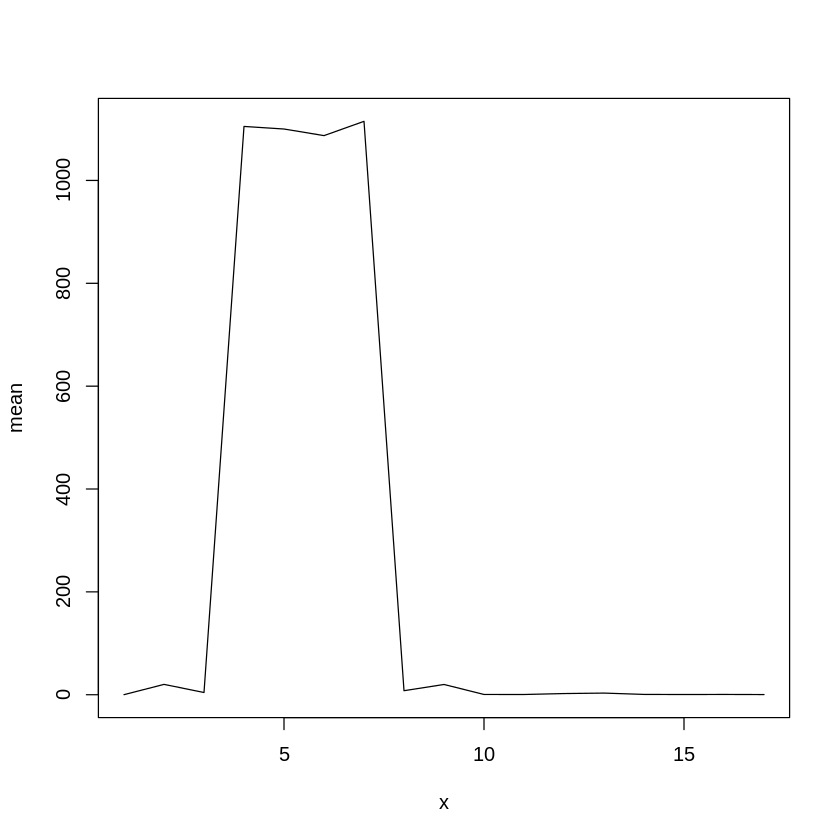

In [ ]:
mean <- colMeans(dat) #promedio de las variables 
x <- c(1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17)
plot(x,mean,type = "l")

## Normalizando

La razón para normalizar nuestras variables es porque estamos realizando un análisis que desea comprender la relación de las variables predictoras y una variable de respuesta. La idea es que cada variable contribuya por igual al análisis.

Al normalizar las variables, podemos estar seguros de que cada variable contribuye por igual al análisis. Dos formas comunes de normalizar (o «escalar») variables incluyen:

* Normalización mínima -máxima: (X – min (X)) / (max (X) – min (X))
* Normalización de la puntuación Z : (X – μ) / σ

**Detalle** El inconveniente de la técnica de normalización mínimo-máximo es que lleva los valores de los datos hacia la media. Si queremos asegurarnos de que los valores atípicos se ponderen más que otros valores, una estandarización de puntaje z es una mejor técnica para implementar.

**Duda** ¿Existen valores atípicos en nuestros datos?

**Decisión** Vamos a normalizar y comparar los datos cuando hagamos el proceso de estandarizar (aparte)

In [ ]:
min_max_norm <- function (x) {
    (x - min(x)) / (max(x) - min (x))
  }

In [ ]:
names(dat)

[1] "recursada"           "tasa_rep_carga"      "quintil_asig"       
 [4] "ceneval_analitico"   "ceneval_matematico"  "ceneval_lengua"     
 [7] "ceneval_esp"         "prom_per_prev"       "tasa_rep_doc"       
[10] "tasa_aprob_per_prev" "asigMuchas"          "año_encurso"        
[13] "complejidad_carga5"  "semestre_Otoño"      "carga_aprobada"     
[16] "total_recursando"    "situacion_Irregular"

vamos a normalizar las siguientes variables predictoras:

In [ ]:
normalizado <-as.data.frame(lapply (dat[c("tasa_rep_carga","quintil_asig","ceneval_analitico","ceneval_matematico","ceneval_lengua","ceneval_esp","prom_per_prev","tasa_rep_doc","tasa_aprob_per_prev","año_encurso","complejidad_carga5","total_recursando")], min_max_norm))

Observamos que ya se encuentran normalizadas nuestras variables:

In [ ]:
ncol(normalizado)

[1] 12

Debemos de unir las variables que hacen falta, ya que se eliminaron al normalizar.

In [ ]:
var <- dat[,c("recursada","asigMuchas","semestre_Otoño","carga_aprobada", "situacion_Irregular")]

In [ ]:
data <- cbind(normalizado,var)

In [ ]:
head(data)

,tasa_rep_carga,quintil_asig,ceneval_analitico,ceneval_matematico,ceneval_lengua,ceneval_esp,prom_per_prev,tasa_rep_doc,tasa_aprob_per_prev,año_encurso,complejidad_carga5,total_recursando,recursada,asigMuchas,semestre_Otoño,carga_aprobada,situacion_Irregular
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,0.1730933,0.7142857,0.4,0.4761905,0.5,0.45,0.8400000,0.86848635,0,0.4,0.00,0,0,0,0,1,0
2,0.2746701,0.7142857,0.4,0.4761905,0.5,0.45,0.8500000,0.49773756,1,0.4,0.00,0,0,0,1,1,0
3,0.2813706,0.9761905,0.4,0.4761905,0.5,0.45,0.7333333,0.44462381,1,0.6,0.00,0,0,0,0,1,0
4,0.4335359,0.4761905,0.4,0.4761905,0.5,0.45,0.7666667,0.04450095,1,0.6,0.00,0,0,0,1,1,0
5,0.4065319,1.0000000,0.4,0.4761905,0.5,0.45,0.8666667,0.27646538,1,0.8,0.25,0,0,1,0,1,0
6,0.1962681,0.4761905,0.4,0.4761905,0.5,0.45,0.8714286,0.00000000,1,0.8,0.25,0,0,0,1,1,0


In [ ]:
write.csv(data, "predictores_train_VIF_NORM.csv", row.names = FALSE)

In [ ]:
nrow(data)

[1] 1295

In [ ]:
#https://statologos.com/como-normalizar-los-datos-en-r/

## Estandarizando

In [ ]:
colnames(copia_dat)

[1] "recursada"           "tasa_rep_carga"      "quintil_asig"       
 [4] "ceneval_analitico"   "ceneval_matematico"  "ceneval_lengua"     
 [7] "ceneval_esp"         "prom_per_prev"       "tasa_rep_doc"       
[10] "tasa_aprob_per_prev" "asigMuchas"          "año_encurso"        
[13] "complejidad_carga5"  "semestre_Otoño"      "carga_aprobada"     
[16] "total_recursando"    "situacion_Irregular"

In [ ]:
estandarizado <- copia_dat%>% mutate_each_ (list (~ scale (.)%>% as.vector),
                                  vars = c("tasa_rep_carga","quintil_asig","ceneval_analitico","ceneval_matematico","ceneval_lengua","ceneval_esp","prom_per_prev","tasa_rep_doc","tasa_aprob_per_prev","año_encurso","complejidad_carga5","total_recursando","recursada","asigMuchas","semestre_Otoño", "situacion_Irregular"))


Warning message:
“`mutate_each_()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.”


In [ ]:
head(estandarizado)

,recursada,tasa_rep_carga,quintil_asig,ceneval_analitico,ceneval_matematico,ceneval_lengua,ceneval_esp,prom_per_prev,tasa_rep_doc,tasa_aprob_per_prev,asigMuchas,año_encurso,complejidad_carga5,semestre_Otoño,carga_aprobada,total_recursando,situacion_Irregular
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,-0.3938257,-1.7573187,-0.3120089,-0.9609444,-0.5957543,-0.2956142,-1.109468,0.4056373,3.04978818,-1.248439,-0.9535863,0.6267618,-1.3219368,-1.2707925,1,-0.6063303,-0.7232739
2,-0.3938257,-1.1777434,-0.3120089,-0.9609444,-0.5957543,-0.2956142,-1.109468,0.4795896,1.16521142,1.115948,-0.9535863,0.6267618,-1.3219368,0.7863029,1,-0.6063303,-0.7232739
3,-0.3938257,-1.1395116,0.6983495,-0.9609444,-0.5957543,-0.2956142,-1.109468,-0.3831874,0.89522555,1.115948,-0.9535863,1.5167360,-1.3219368,-1.2707925,1,-0.6063303,-0.7232739
4,-0.3938257,-0.2712895,-1.2305166,-0.9609444,-0.5957543,-0.2956142,-1.109468,-0.1366797,-1.13866435,1.115948,-0.9535863,1.5167360,-1.3219368,0.7863029,1,-0.6063303,-0.7232739
5,-0.3938257,-0.4253684,0.7902003,-0.9609444,-0.5957543,-0.2956142,-1.109468,0.6028435,0.04044875,1.115948,1.0478630,2.4067103,-0.7231582,-1.2707925,1,-0.6063303,-0.7232739
6,-0.3938257,-1.6250883,-1.2305166,-0.9609444,-0.5957543,-0.2956142,-1.109468,0.6380589,-1.36486997,1.115948,-0.9535863,2.4067103,-0.7231582,0.7863029,1,-0.6063303,-0.7232739


In [ ]:
#mean
mean(copia_dat$situacion_Irregular)

#sd
sd(copia_dat$recursada)

#unique(estandarizado$ceneval_analitico)

[1] 0.3436293

[1] 0.3411736

In [ ]:
#mean
mean(estandarizado$asigMuchas)

#sd
sd(estandarizado$asigMuchas)

[1] -2.364457e-17

[1] 1

In [ ]:
#mean
mean(estandarizado$tasa_rep_carga)

#sd
sd(estandarizado$tasa_rep_carga)

[1] -8.404534e-18

[1] 1

In [ ]:
nrow(estandarizado)

[1] 1295

In [ ]:
ncol(estandarizado)

[1] 17

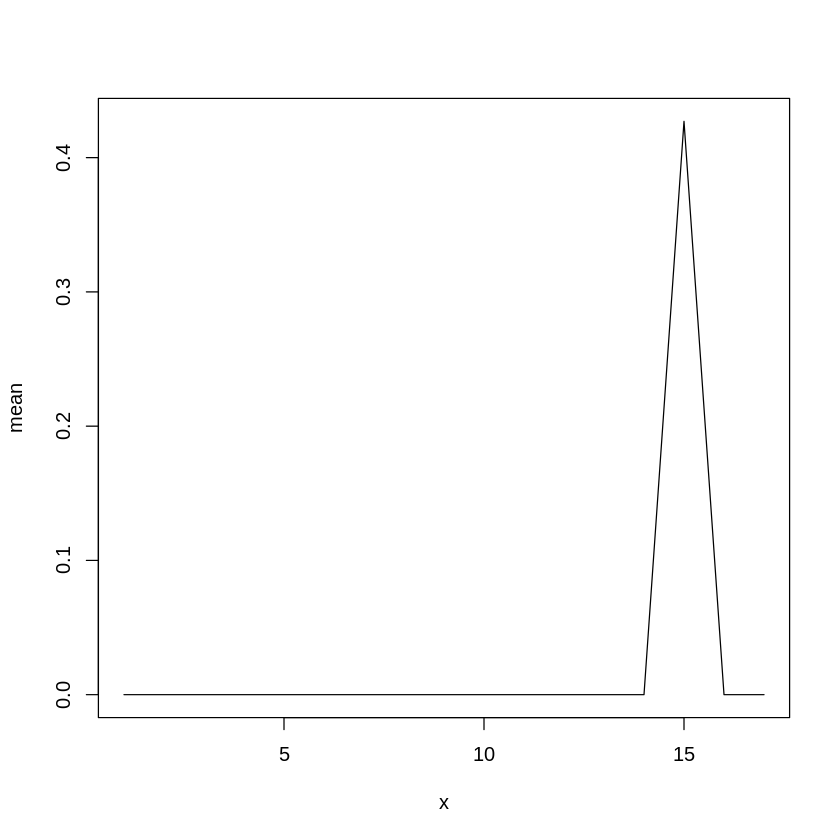

In [ ]:
mean <- colMeans(estandarizado) #promedio de las variables 
x <- c(1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17)
plot(x,mean,type = "l")

In [ ]:
write.csv(estandarizado, "predictores_train_VIF_EST.csv", row.names = FALSE)

In [ ]:
#https://statologos.com/estandarizar-datos-en-r/

## Estandarizado Anterior

In [ ]:
aprobada <- dat$carga_aprobada

In [ ]:
dat$carga_aprobada <- NULL
df4 <- dat %>% mutate_all (~ ( scale (.)%>% as.vector ))
df4 <- cbind(df4, aprobada)
head(df4)


,recursada,tasa_rep_carga,tasa_rep_asig,prom_per_prev,tasa_rep_doc,tasa_aprob_per_prev,asigMuchas,año_encurso,complejidad_carga5,semestre_Otoño,total_recursando,situacion_Irregular,aprobada
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.3938257,-1.7573187,-0.7002182,0.4056373,3.04978818,-1.248439,-0.9535863,0.6267618,-1.3219368,-1.2707925,-0.6063303,-0.7232739,1
2,-0.3938257,-1.1777434,-0.7593270,0.4795896,1.16521142,1.115948,-0.9535863,0.6267618,-1.3219368,0.7863029,-0.6063303,-0.7232739,1
3,-0.3938257,-1.1395116,-0.1152677,-0.3831874,0.89522555,1.115948,-0.9535863,1.5167360,-1.3219368,-1.2707925,-0.6063303,-0.7232739,1
4,-0.3938257,-0.2712895,-0.9432776,-0.1366797,-1.13866435,1.115948,-0.9535863,1.5167360,-1.3219368,0.7863029,-0.6063303,-0.7232739,1
5,-0.3938257,-0.4253684,0.3850113,0.6028435,0.04044875,1.115948,1.0478630,2.4067103,-0.7231582,-1.2707925,-0.6063303,-0.7232739,1
6,-0.3938257,-1.6250883,-1.1399969,0.6380589,-1.36486997,1.115948,-0.9535863,2.4067103,-0.7231582,0.7863029,-0.6063303,-0.7232739,1


In [ ]:
est <- df4
colnames(est)[13] <- "carga_aprobada"

In [ ]:
nrow(est)

[1] 1295

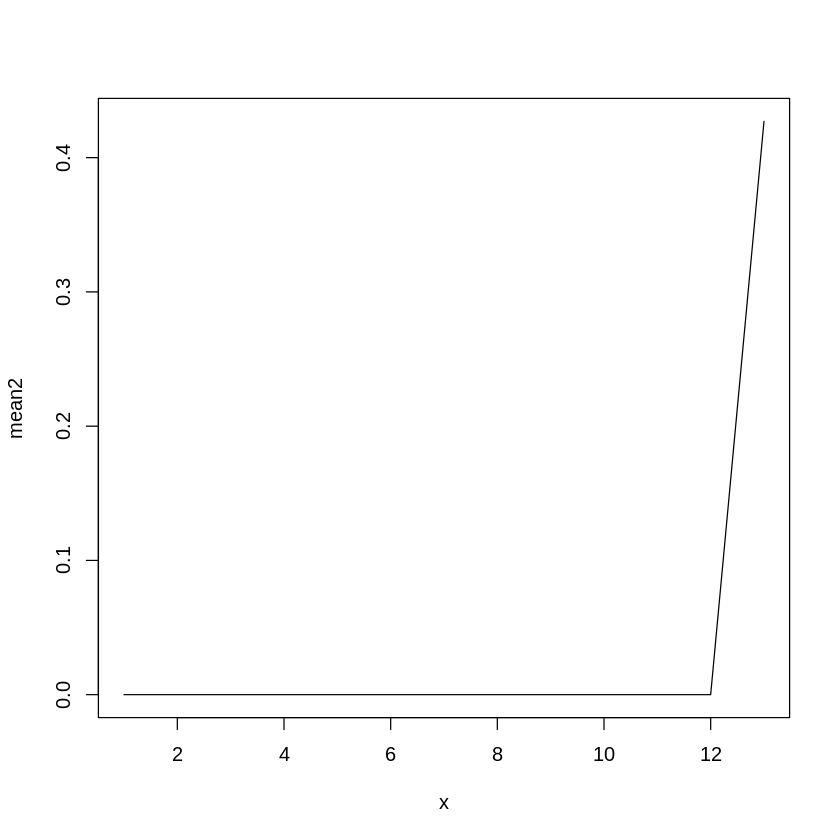

In [ ]:
mean2 <- colMeans(est) #promedio de las variables 
x <- c(1, 2, 3, 4, 5,6,7,8,9,10,11,12,13)
plot(x,mean2,type = "l")

## Observaciones

**Total recursando** Existe la misma cantidad de asignaciones en normaliazción y estandarización, sólamente que se asignaron diferentes valores por ser difernetes métodos.

**Año en curso** Ocurre lo mismo que lo anterior, misma cantidad de valores pero diferentes valores por ser diferentes métodos.